<a href="https://colab.research.google.com/github/ni414/notebook/blob/master/RainfallPred_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
from sklearn import preprocessing

datasetpath='/content/drive/My Drive/rainfall_data.npy'
dataset=np.load(datasetpath)
#print(dataset.shape)
#print(np.isnan(dataset))
#print(dataset<0)
datasetcopy=dataset.copy()
datasetcopy=np.where(datasetcopy<0,0,datasetcopy)
#print(datasetcopy<0)
normalized_data=np.zeros_like(datasetcopy)
#normalized_data[0,0] = preprocessing.normalize(datasetcopy[0,0])
#print(normalized_data[0][0])

xaxis=np.loadtxt('xaxis.txt')
yaxis=np.loadtxt('yaxis.txt')
#print((xaxis.shape))
#print(xaxis)
#print(yaxis)

years=np.arange(1901,2016)
training_years=np.arange(1901,2001)
testing_years=np.arange(2001,2016)
months=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

mask = np.zeros_like(datasetcopy, dtype=np.bool)

for ye in range(len(years)):
  for m in range(len(months)):
    for x in range(len(xaxis)):
      for y in range(len(yaxis)):
        if datasetcopy[ye, m, y, x] < 0:
          mask[ye, m, y, x] = True
    normalized_data[ye, m, :, :] = preprocessing.normalize(datasetcopy[ye, m, :, :])
#print(normalized_data)

In [52]:
training_data=np.zeros((100,12,129,135))
testing_data=np.zeros((15,12,129,135))

training_data=normalized_data[0:100]
testing_data=normalized_data[100:116]
ne_x=(xaxis[87:123])
ne_y=(yaxis[62:93])


[88.25 88.5  88.75 89.   89.25 89.5  89.75 90.   90.25 90.5  90.75 91.
 91.25 91.5  91.75 92.   92.25 92.5  92.75 93.   93.25 93.5  93.75 94.
 94.25 94.5  94.75 95.   95.25 95.5  95.75 96.   96.25 96.5  96.75 97.  ]
[22.   22.25 22.5  22.75 23.   23.25 23.5  23.75 24.   24.25 24.5  24.75
 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25 27.5  27.75
 28.   28.25 28.5  28.75 29.   29.25 29.5 ]


In [42]:
rf1901=datasetcopy[6][4]
print(np.min(rf1901))
print(np.max(rf1901))

0.0
15.03225806451613


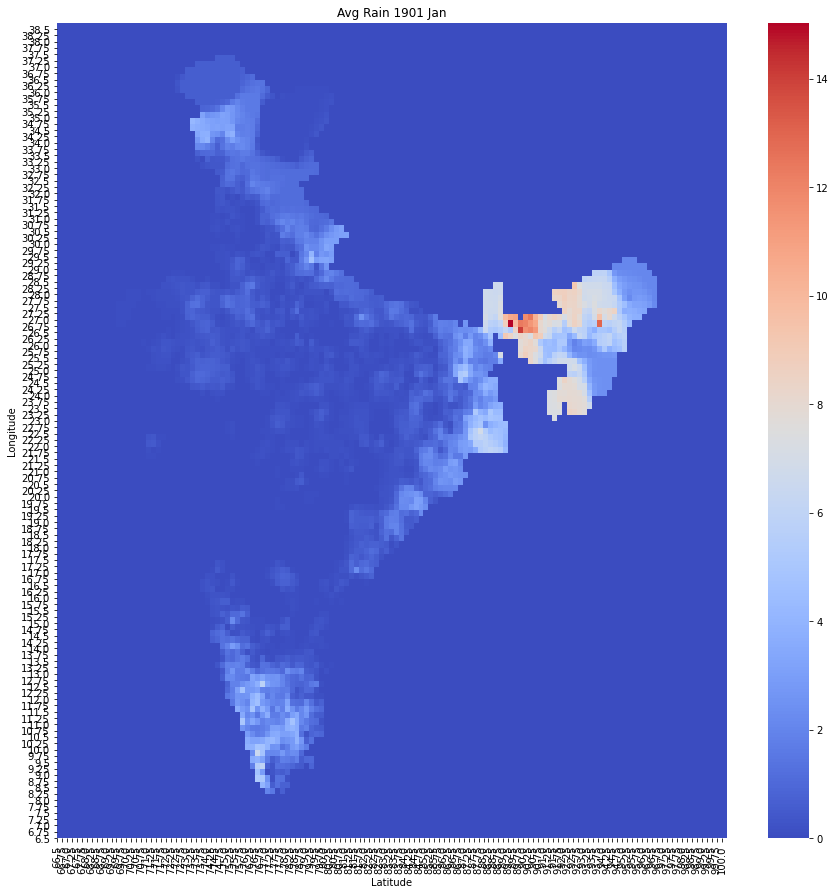

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

msk=mask[0][0]

plt.figure(figsize=(15,15))
sns.heatmap(rf1901,mask=msk,vmin=0,vmax=np.max(rf1901),cmap='coolwarm')
plt.title("Avg Rain 1901 Jan")
plt.gca().invert_yaxis()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xticks(range(len(xaxis)), xaxis)
plt.yticks(range(len(yaxis)), yaxis)
plt.show()